### CBS Data

https://www.cbs.nl/en-gb/visualisations/income-distribution-spendable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_52846/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

file_path = '/Applications/UNI/Thesis/datasets/Distribution of spendable income, 2022.csv'
income_distribution = pd.read_csv(file_path)
income_distribution.head()


,spendable income (x 1000 euros),Households total,Single persion,Single person under AOW pension age,Single person above AOW entitlement age,Couple without children,Couple under AOW pension age without children,Couple above AOW entitlement age without children,Couple with children,Single-parent family,...,Three earners,Four or more earners,Wages,Profits,Pensions,Benefits,Private home owner,Tenant,Tenant without rent benefit,Tenant with rent benefit
0,less than -6,4,2,1,1,1,1,0,1,0,...,0,0,1,2,1,0,3,1,1,0
1,between -6 and -4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,between -4 and -2,2,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
3,between -2 and 0,21,19,19,0,1,1,0,0,0,...,0,0,7,2,0,12,1,20,19,1
4,between 0 and 2,38,35,32,2,2,2,0,0,0,...,0,0,22,4,2,10,1,36,29,7


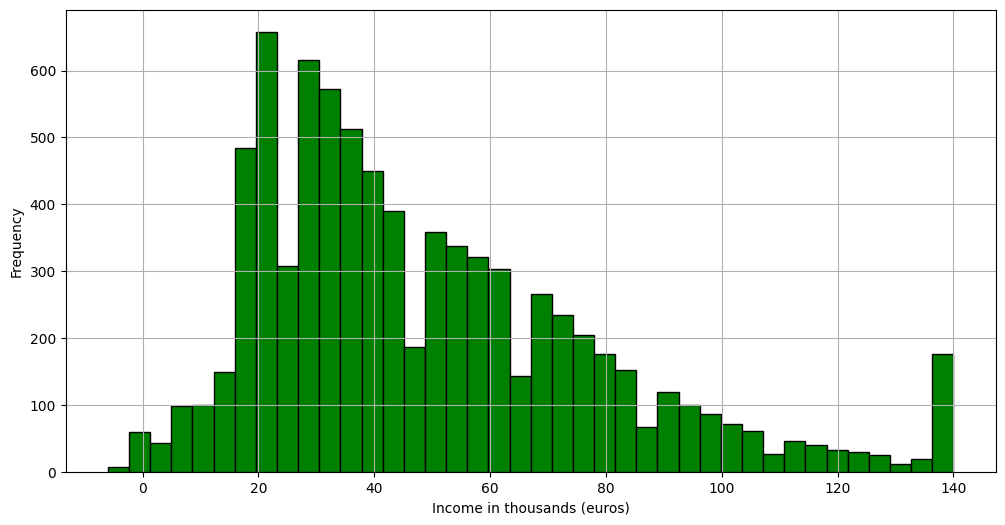

In [3]:

income_distribution = income_distribution[['spendable income (x 1000 euros)', 'Households total']]

def convert_income_category(category):
    if 'less than' in category:
        return -6
    elif 'between' in category:
        parts = category.split(' and ')
        return (float(parts[0].split()[-1]) + float(parts[1].split()[0])) / 2
    elif 'more than' in category:
        return 140
    else:
        return float(category)

income_distribution['Income in thousands'] = income_distribution['spendable income (x 1000 euros)'].apply(convert_income_category)

total_households = income_distribution['Households total'].sum()


income_distribution['Probability'] = income_distribution['Households total'] / total_households


plt.figure(figsize=(12, 6))
plt.hist(income_distribution['Income in thousands'], bins=40, weights=income_distribution['Households total'], color = 'green', edgecolor='black')
plt.xlabel('Income in thousands (euros)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

output_file_path = '/Applications/UNI/Thesis/datasets/Adjusted_Distribution_of_spendable_income_2022.csv'
income_distribution.to_csv(output_file_path, index=False)


